In [4]:
!pip install SimpleITK

     |████████████████████████████████| 52.4 MB 300 kB/s  eta 0:00:01     |██████▍                         | 10.5 MB 11.3 MB/s eta 0:00:04


In [1]:
# import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import os
import SimpleITK as sitk
from scipy.ndimage import gaussian_filter1d

In [4]:
dataset_dir = [os.path.join('../../Task1/brain/', mri_path, 'mr.nii.gz') for mri_path in os.listdir('../../Task1/brain/')]
# img = nib.load(dataset_dir[0]).get_fdata()

In [9]:
np.max(img.flatten())

993.0

In [13]:
shape_list = []
for mri_img_path in dataset_dir:
    mri_img = nib.load(mri_img_path).get_fdata()
    shape_list.append((mri_img.shape, mri_img_path))
    

In [14]:
shape_list[:3]

[((212, 246, 181), '../Task1/brain/1BB033/mr.nii.gz'),
 ((190, 247, 197), '../Task1/brain/1BA076/mr.nii.gz'),
 ((220, 241, 185), '../Task1/brain/1BB145/mr.nii.gz')]

In [41]:
len(temp_img)
# len(temp_img[temp_img != 0])

9439512

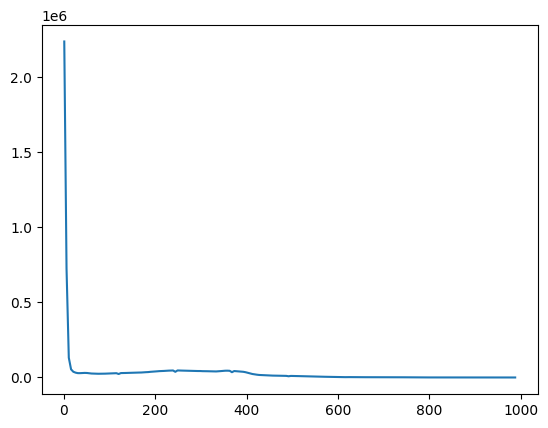

In [57]:
temp_img = img.flatten()
temp_img = temp_img[temp_img != np.min(temp_img)]
# temp_img = temp_img[temp_img >= 20]
freq, bins = np.histogram(temp_img, bins=200)
plt.plot(bins[:-1],freq)

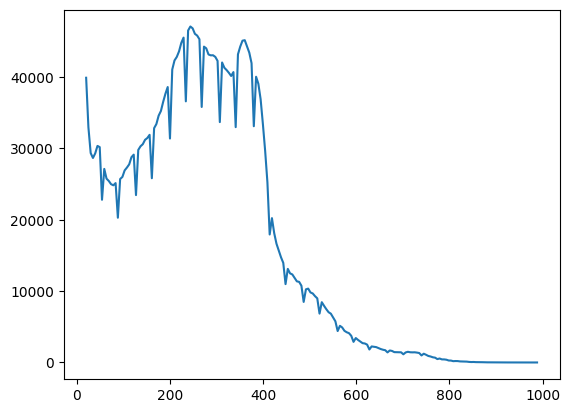

In [58]:
temp_img = temp_img[temp_img >= 20]
freq, bins = np.histogram(temp_img, bins=200)
plt.plot(bins[:-1],freq)

Some more histagram

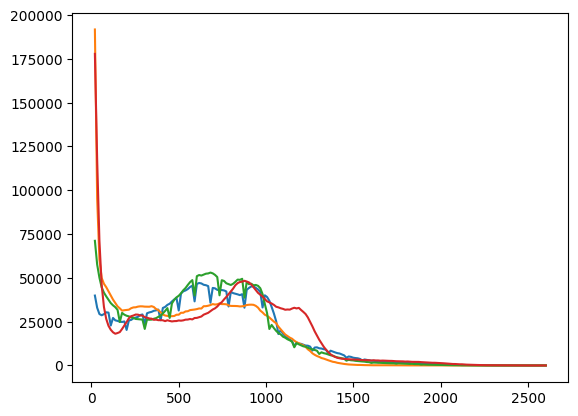

In [59]:
hist_data = []
plt.figure()
for mri_img_path in dataset_dir[:4]:
    mri_img = nib.load(mri_img_path).get_fdata()
    temp_img = mri_img.flatten()
    temp_img = temp_img[temp_img != np.min(temp_img)]
    temp_img = temp_img[temp_img >= 20]
    freq, bins = np.histogram(temp_img, bins=200)
    hist_data.append(freq)

for hist in hist_data:
    plt.plot(bins[:-1], hist)
plt.show()

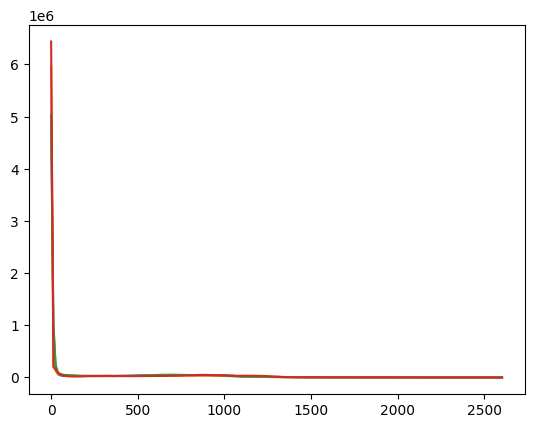

In [67]:
hist_data = []
bin_data = []
plt.figure()
for mri_img_path in dataset_dir[:4]:
    mri_img = nib.load(mri_img_path).get_fdata()
    temp_img = mri_img.flatten()
    # temp_img = temp_img[temp_img >= 20]
    freq, bins = np.histogram(temp_img, bins=200)
    bin_data.append(bins)
    hist_data.append(freq)

for hist in hist_data:
    plt.plot(bins[:-1], hist)
plt.show()

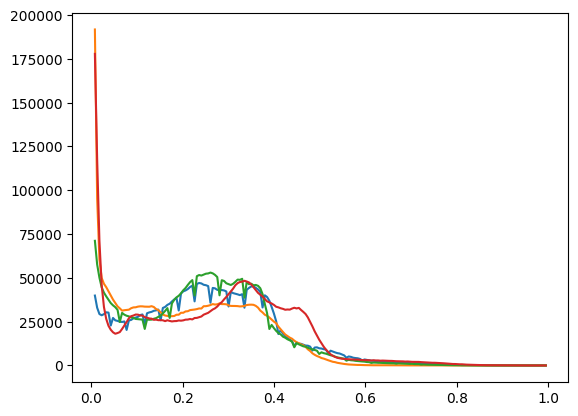

In [64]:
threshold = 20

hist_data = []
plt.figure()
for mri_img_path in dataset_dir[:4]:
    mri_img = nib.load(mri_img_path).get_fdata()
    temp_img = mri_img.flatten()

    min_val, max_val = np.min(temp_img), np.max(temp_img)
    temp_img = (temp_img - min_val) / (max_val - min_val)

    temp_img = temp_img[temp_img >= threshold / max_val]
    freq, bins = np.histogram(temp_img, bins=200)
    hist_data.append(freq)

for hist in hist_data:
    plt.plot(bins[:-1], hist)
plt.show()

In [68]:
[np.max(binss) for binss in bin_data]

[993.0, 2981.6162109375, 1002.0, 2614.65234375]

Let's see if by removing the values below 20 am i doing good or not

In [3]:
img = sitk.ReadImage(dataset_dir[1])
img = sitk.GetArrayFromImage(img)

(-0.5, 189.5, 196.5, -0.5)

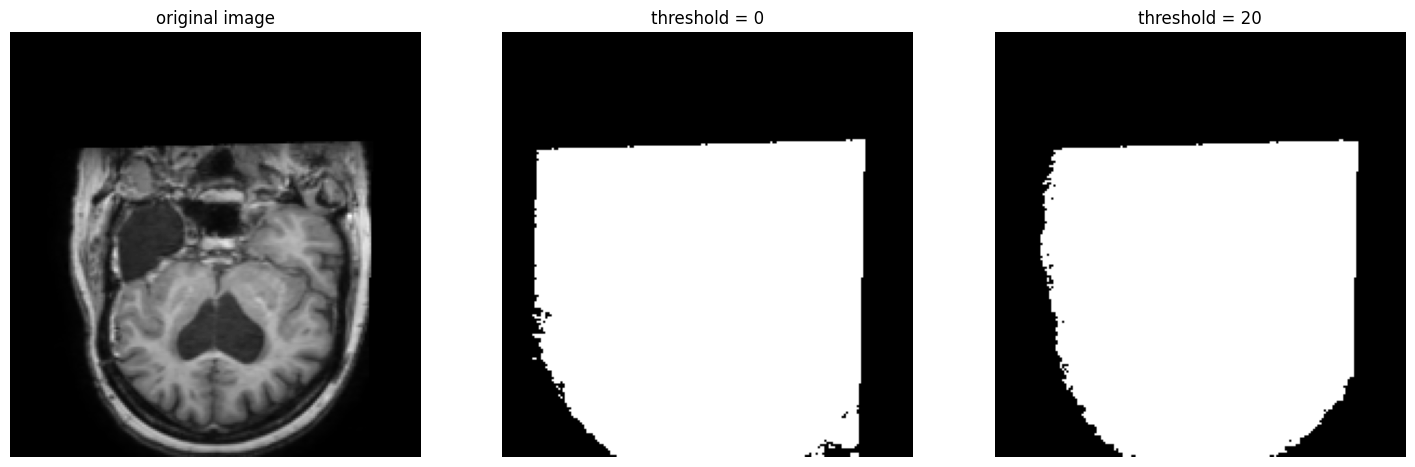

In [32]:
slice_number = 100
threshold = 20

mask1, mask2 = np.zeros_like(img, dtype=bool), np.zeros_like(img, dtype=bool)
mask1[img > 0] = 1
mask2[img > threshold] = 1

plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
plt.imshow(img[:,slice_number,:], cmap='gray')
plt.axis('off')
plt.title('original image')
plt.subplot(1,3,2)
plt.imshow(mask1[:,slice_number,:], cmap='gray')
plt.title('threshold = 0')
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(mask2[:,slice_number,:], cmap='gray')
plt.title('threshold = 20')
plt.axis('off')

Let's do it more beautifully

In [ ]:
!pip install ipympl

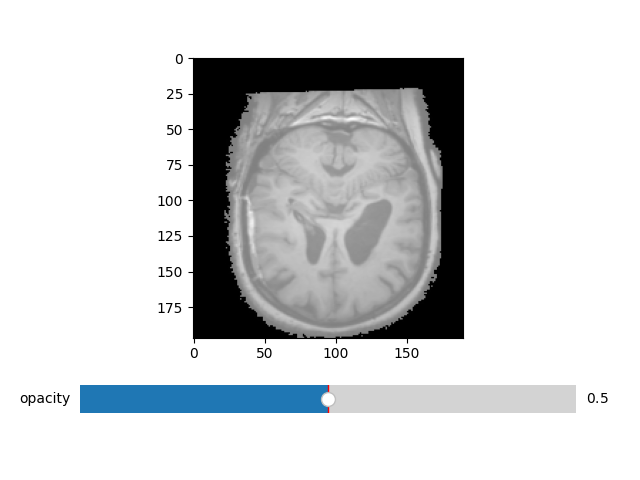

In [8]:
%matplotlib ipympl

import matplotlib.widgets as mpwidgets

OPACITY = 0.5
slice_number = 150
threshold = 30

mask = np.zeros_like(img, dtype=bool)
mask[img > threshold] = 1


# PLOT
fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [5, 1]})
img0 = ax0.imshow(img[:,slice_number,:], cmap="gray")
# img1 = ax0.imshow(mask[:,slice_number,:], alpha=OPACITY, cmap="gray")
img1 = ax0.imshow(mask[:,slice_number,:], alpha=OPACITY, cmap="gray")


def update(value): 
    img1.set_alpha(value)    
    fig.canvas.draw_idle()

slider0 = mpwidgets.Slider(ax=ax1, label='opacity', valmin=0, valmax=1, valinit=OPACITY)
slider0.on_changed(update)

plt.show()

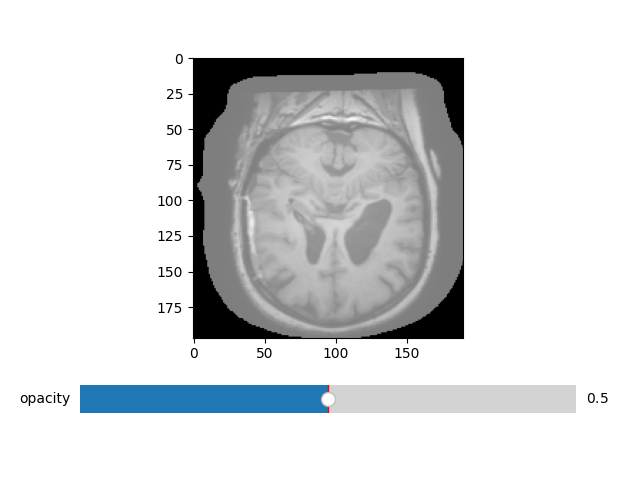

In [7]:
%matplotlib ipympl

import matplotlib.widgets as mpwidgets

OPACITY = 0.5
slice_number = 150
threshold = 30

mask = sitk.GetArrayFromImage(sitk.ReadImage('/'.join(list(np.concatenate((np.array(dataset_dir[1].split('/')[:-1]),['mask.nii.gz']))))))

# PLOT
fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [5, 1]})
img0 = ax0.imshow(img[:,slice_number,:], cmap="gray")
# img1 = ax0.imshow(mask[:,slice_number,:], alpha=OPACITY, cmap="gray")
img1 = ax0.imshow(mask[:,slice_number,:], alpha=OPACITY, cmap="gray")


def update(value): 
    img1.set_alpha(value)    
    fig.canvas.draw_idle()

slider0 = mpwidgets.Slider(ax=ax1, label='opacity', valmin=0, valmax=1, valinit=OPACITY)
slider0.on_changed(update)

plt.show()

It seems threshold = 30 works good

now let's do the normalization

## Histogram Normalization

Here I will normalize the histograms using z-score and I do this specific to each data subset. we have three data sources which comes from different MRI machine. 

In [2]:
dataset_dir = [os.path.join('../../Task1/brain/', mri_path, 'mr.nii.gz') for mri_path in os.listdir('../../Task1/brain/')]
mask_dir = [os.path.join('../../Task1/brain/', mri_path, 'mask.nii.gz') for mri_path in os.listdir('../../Task1/brain/')]

In [3]:
category = [dataset_dir[i].split('/')[-2][2] for i in range(len(dataset_dir))]
np.unique(np.array(category), return_counts = True)

(array(['A', 'B', 'C'], dtype='<U1'), array([60, 60, 60]))

In [10]:
list(zip(dataset_dir, mask_dir,category))[:4]

[('../../Task1/brain/1BB033/mr.nii.gz',
  '../../Task1/brain/1BB033/mask.nii.gz',
  'B'),
 ('../../Task1/brain/1BA076/mr.nii.gz',
  '../../Task1/brain/1BA076/mask.nii.gz',
  'A'),
 ('../../Task1/brain/1BB145/mr.nii.gz',
  '../../Task1/brain/1BB145/mask.nii.gz',
  'B'),
 ('../../Task1/brain/1BA294/mr.nii.gz',
  '../../Task1/brain/1BA294/mask.nii.gz',
  'A')]

In [5]:
category_dir = {'A':[], 'B':[], 'C':[]}
for dir,cat in zip(zip(dataset_dir,mask_dir), category):
    if cat == 'A':
        category_dir['A'].append(dir)
    if cat == 'B':
        category_dir['B'].append(dir)
    if cat == 'C':
        category_dir['C'].append(dir)

In [55]:
category_dir['A'][:2]

[('../Task1/brain/1BA076/mr.nii.gz', '../Task1/brain/1BA076/mask.nii.gz'),
 ('../Task1/brain/1BA294/mr.nii.gz', '../Task1/brain/1BA294/mask.nii.gz')]

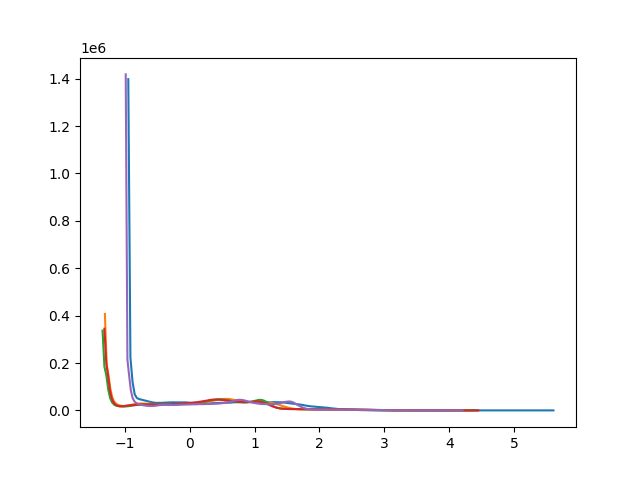

In [14]:
hist_data = []
bin_data = []

for mri_img_path,mask_path in category_dir['A'][:5]:
    mri_img = sitk.ReadImage(mri_img_path)
    mri_img = sitk.GetArrayFromImage(mri_img)

    mask = sitk.ReadImage(mask_path)
    mask = sitk.GetArrayFromImage(mask).astype(bool)

    mri_img_masked = mri_img[mask]

    img_mean = np.mean(mri_img_masked)
    img_var = np.std(mri_img_masked)

    normalized_img = (mri_img_masked - img_mean) / img_var

    # getting histogram
    freq, bins = np.histogram(normalized_img.flatten(), bins=200)
    bin_data.append(bins)
    hist_data.append(freq)

plt.figure()
for binss,hist in zip(bin_data, hist_data):
    plt.plot(binss[:-1], hist)
plt.show()


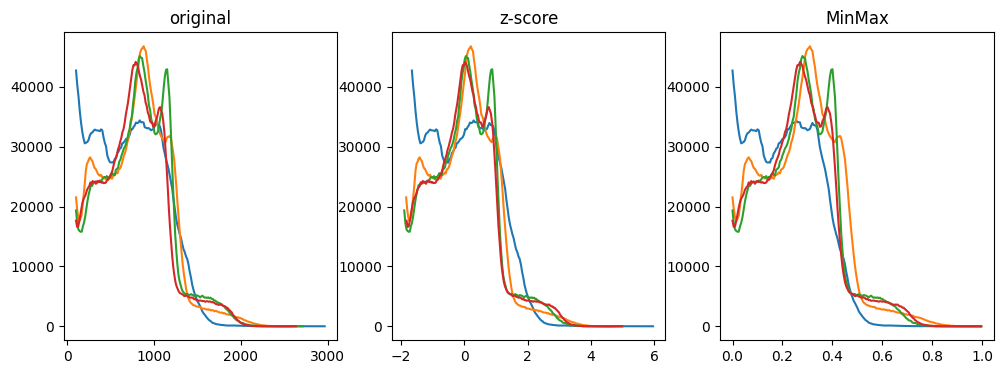

In [8]:
hist_data = []
bin_data = []

hist_data_before_norm = []
bin_data_before_norm = []

hist_data_minmax_norm = []
bin_data_minmax_norm = []

for mri_img_path,mask_path in category_dir['A'][:4]:
    mri_img = sitk.ReadImage(mri_img_path)
    mri_img = sitk.GetArrayFromImage(mri_img)

    mask = sitk.ReadImage(mask_path)
    mask = sitk.GetArrayFromImage(mask).astype(bool)

    threshold = 100
    mask2 = np.zeros_like(mri_img, dtype=bool)
    mask2[mri_img > threshold] = 1

    mri_img_masked = mri_img[mask & mask2]

    img_mean = np.mean(mri_img_masked)
    img_var = np.std(mri_img_masked)

    normalized_img = (mri_img_masked - img_mean) / img_var

    # getting histogram
    freq, bins = np.histogram(normalized_img.flatten(), bins=200)
    bin_data.append(bins)
    hist_data.append(freq)

    # for evaluation of the result
    freq, bins = np.histogram(mri_img_masked.flatten(), bins=200)
    bin_data_before_norm.append(bins)
    hist_data_before_norm.append(freq)

    # also with minmax normalization for comparison
    min_value = np.min(mri_img_masked)
    max_value = np.max(mri_img_masked)
    minmax_normalized = (mri_img_masked - min_value) / (max_value - min_value)
    freq, bins = np.histogram(minmax_normalized.flatten(), bins=200)
    bin_data_minmax_norm.append(bins)
    hist_data_minmax_norm.append(freq)

plt.figure(figsize=(12,4))
for binss,hist in zip(bin_data_before_norm, hist_data_before_norm):
    plt.subplot(1,3,1)
    plt.plot(binss[:-1], hist)
plt.title('original')
for binss,hist in zip(bin_data, hist_data):
    plt.subplot(1,3,2)
    plt.plot(binss[:-1], hist)
plt.title('z-score')
for binss,hist in zip(bin_data_minmax_norm, hist_data_minmax_norm):
    plt.subplot(1,3,3)
    plt.plot(binss[:-1], hist)
plt.title('MinMax')
plt.show()


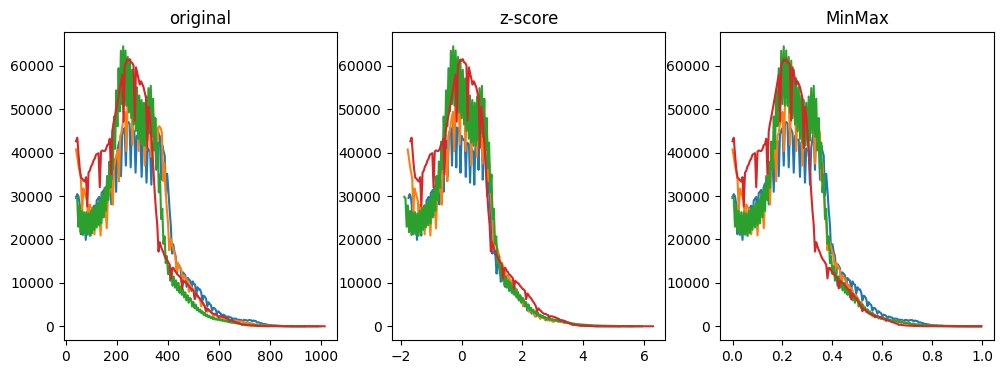

In [13]:
hist_data = []
bin_data = []

hist_data_before_norm = []
bin_data_before_norm = []

hist_data_minmax_norm = []
bin_data_minmax_norm = []

for mri_img_path,mask_path in category_dir['B'][:4]:
    mri_img = sitk.ReadImage(mri_img_path)
    mri_img = sitk.GetArrayFromImage(mri_img)

    mask = sitk.ReadImage(mask_path)
    mask = sitk.GetArrayFromImage(mask).astype(bool)

    threshold = 40
    mask2 = np.zeros_like(mri_img, dtype=bool)
    mask2[mri_img > threshold] = 1

    mri_img_masked = mri_img[mask & mask2]

    img_mean = np.mean(mri_img_masked)
    img_var = np.std(mri_img_masked)

    normalized_img = (mri_img_masked - img_mean) / img_var

    # getting histogram
    freq, bins = np.histogram(normalized_img.flatten(), bins=200)
    bin_data.append(bins)
    hist_data.append(freq)

    # for evaluation of the result
    freq, bins = np.histogram(mri_img_masked.flatten(), bins=200)
    bin_data_before_norm.append(bins)
    hist_data_before_norm.append(freq)

    # also with minmax normalization for comparison
    min_value = np.min(mri_img_masked)
    max_value = np.max(mri_img_masked)
    minmax_normalized = (mri_img_masked - min_value) / (max_value - min_value)
    freq, bins = np.histogram(minmax_normalized.flatten(), bins=200)
    bin_data_minmax_norm.append(bins)
    hist_data_minmax_norm.append(freq)

plt.figure(figsize=(12,4))
for binss,hist in zip(bin_data_before_norm, hist_data_before_norm):
    plt.subplot(1,3,1)
    plt.plot(binss[:-1], hist)
plt.title('original')
for binss,hist in zip(bin_data, hist_data):
    plt.subplot(1,3,2)
    plt.plot(binss[:-1], hist)
plt.title('z-score')
for binss,hist in zip(bin_data_minmax_norm, hist_data_minmax_norm):
    plt.subplot(1,3,3)
    plt.plot(binss[:-1], hist)
plt.title('MinMax')
plt.show()


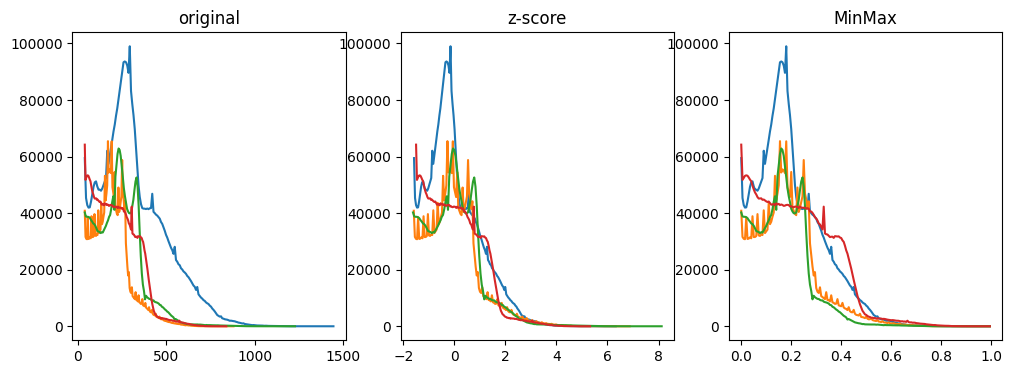

In [18]:
hist_data = []
bin_data = []

hist_data_before_norm = []
bin_data_before_norm = []

hist_data_minmax_norm = []
bin_data_minmax_norm = []

for mri_img_path,mask_path in category_dir['C'][:4]:
    mri_img = sitk.ReadImage(mri_img_path)
    mri_img = sitk.GetArrayFromImage(mri_img)

    mask = sitk.ReadImage(mask_path)
    mask = sitk.GetArrayFromImage(mask).astype(bool)

    threshold = 40
    mask2 = np.zeros_like(mri_img, dtype=bool)
    mask2[mri_img > threshold] = 1

    mri_img_masked = mri_img[mask & mask2]

    img_mean = np.mean(mri_img_masked)
    img_var = np.std(mri_img_masked)

    normalized_img = (mri_img_masked - img_mean) / img_var

    # getting histogram
    freq, bins = np.histogram(normalized_img.flatten(), bins=200)
    bin_data.append(bins)
    hist_data.append(freq)

    # for evaluation of the result
    freq, bins = np.histogram(mri_img_masked.flatten(), bins=200)
    bin_data_before_norm.append(bins)
    hist_data_before_norm.append(freq)

    # also with minmax normalization for comparison
    min_value = np.min(mri_img_masked)
    max_value = np.max(mri_img_masked)
    minmax_normalized = (mri_img_masked - min_value) / (max_value - min_value)
    freq, bins = np.histogram(minmax_normalized.flatten(), bins=200)
    bin_data_minmax_norm.append(bins)
    hist_data_minmax_norm.append(freq)

plt.figure(figsize=(12,4))
for binss,hist in zip(bin_data_before_norm, hist_data_before_norm):
    plt.subplot(1,3,1)
    plt.plot(binss[:-1], hist)
plt.title('original')
for binss,hist in zip(bin_data, hist_data):
    plt.subplot(1,3,2)
    plt.plot(binss[:-1], hist)
plt.title('z-score')
for binss,hist in zip(bin_data_minmax_norm, hist_data_minmax_norm):
    plt.subplot(1,3,3)
    plt.plot(binss[:-1], hist)
plt.title('MinMax')
plt.show()


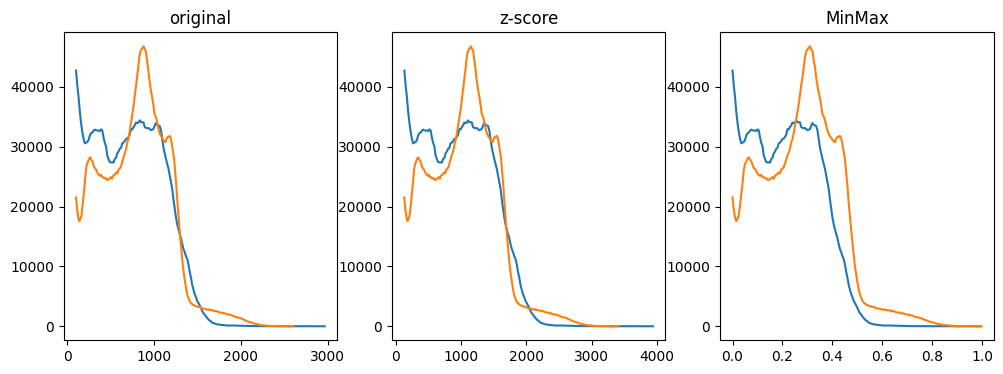

In [39]:
hist_data = []
bin_data = []

hist_data_before_norm = []
bin_data_before_norm = []

hist_data_minmax_norm = []
bin_data_minmax_norm = []

for mri_img_path,mask_path in category_dir['A'][:2]:
    mri_img = sitk.ReadImage(mri_img_path)
    mri_img = sitk.GetArrayFromImage(mri_img)

    mask_original = sitk.ReadImage(mask_path)
    mask_original = sitk.GetArrayFromImage(mask_original).astype(bool)

    threshold = 100
    mask_threshold = np.zeros_like(mri_img, dtype=bool)
    mask_threshold[mri_img > threshold] = 1

    # mri_img_masked = mri_img[mask_original & mask_threshold]
    mri_img_masked = np.where(mask_original & mask_threshold, mri_img, 0)

    img_mean = np.mean(mri_img_masked[mri_img_masked != 0])
    img_var = np.std(mri_img_masked[mri_img_masked != 0])

    normalized_img = (mri_img_masked - img_mean) / img_var
    normalized_img += np.abs(np.min(normalized_img))
    normalized_img *= 500

    # getting histogram
    freq, bins = np.histogram(normalized_img[normalized_img !=0].flatten(), bins=200)
    bin_data.append(bins)
    hist_data.append(freq)

    # for evaluation of the result
    freq, bins = np.histogram(mri_img_masked[mri_img_masked != 0].flatten(), bins=200)
    bin_data_before_norm.append(bins)
    hist_data_before_norm.append(freq)

    # also with minmax normalization for comparison
    min_value = np.min(mri_img_masked[mri_img_masked != 0])
    max_value = np.max(mri_img_masked[mri_img_masked != 0])
    minmax_normalized = (mri_img_masked[mri_img_masked != 0] - min_value) / (max_value - min_value)
    freq, bins = np.histogram(minmax_normalized.flatten(), bins=200)
    bin_data_minmax_norm.append(bins)
    hist_data_minmax_norm.append(freq)

plt.figure(figsize=(12,4))
for binss,hist in zip(bin_data_before_norm, hist_data_before_norm):
    plt.subplot(1,3,1)
    plt.plot(binss[:-1], hist)
plt.title('original')
for binss,hist in zip(bin_data, hist_data):
    plt.subplot(1,3,2)
    plt.plot(binss[:-1], hist)
plt.title('z-score')
for binss,hist in zip(bin_data_minmax_norm, hist_data_minmax_norm):
    plt.subplot(1,3,3)
    plt.plot(binss[:-1], hist)
plt.title('MinMax')
plt.show()


I guess now I know how to do this. let's build some tools to visualize what want to do and apply the normalization to see how it works in practice

In [20]:
# np.array(list(zip(dataset_dir, mask_dir,category)))[[0,1,7]]
[(category_dir[key][i],key) for key in ['A','B','C'] for i in range(1)]

[(('../Task1/brain/1BA076/mr.nii.gz', '../Task1/brain/1BA076/mask.nii.gz'),
  'A'),
 (('../Task1/brain/1BB033/mr.nii.gz', '../Task1/brain/1BB033/mask.nii.gz'),
  'B'),
 (('../Task1/brain/1BC087/mr.nii.gz', '../Task1/brain/1BC087/mask.nii.gz'),
  'C')]

In [17]:
mixed_dir

[(('../../Task1/brain/1BA076/mr.nii.gz',
   '../../Task1/brain/1BA076/mask.nii.gz'),
  'A'),
 (('../../Task1/brain/1BA294/mr.nii.gz',
   '../../Task1/brain/1BA294/mask.nii.gz'),
  'A'),
 (('../../Task1/brain/1BB033/mr.nii.gz',
   '../../Task1/brain/1BB033/mask.nii.gz'),
  'B'),
 (('../../Task1/brain/1BB145/mr.nii.gz',
   '../../Task1/brain/1BB145/mask.nii.gz'),
  'B'),
 (('../../Task1/brain/1BC087/mr.nii.gz',
   '../../Task1/brain/1BC087/mask.nii.gz'),
  'C'),
 (('../../Task1/brain/1BC064/mr.nii.gz',
   '../../Task1/brain/1BC064/mask.nii.gz'),
  'C')]

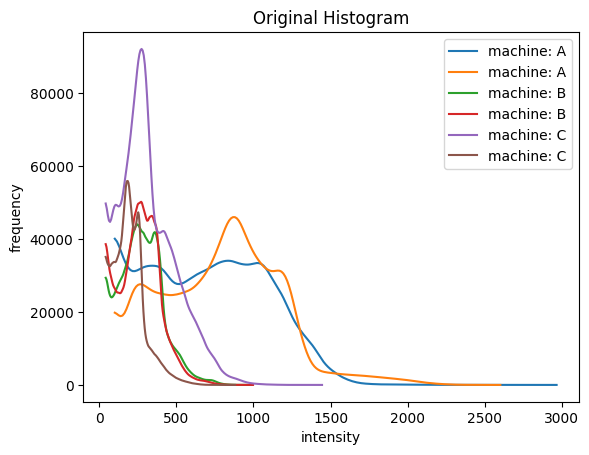

In [35]:
hist_data = []
bin_data = []
label_data = []
mixed_dir = [(category_dir[key][i],key) for key in ['A','B','C'] for i in range(2)]
threshold_dict = {'A':100, 'B':40, 'C':40}

for (mri_img_path,mask_path),cat in mixed_dir:
    mri_img = sitk.ReadImage(mri_img_path)
    mri_img = sitk.GetArrayFromImage(mri_img)
    mask_original = sitk.ReadImage(mask_path)
    mask_original = sitk.GetArrayFromImage(mask_original).astype(bool)

    threshold = threshold_dict[cat]
    mask_threshold = np.zeros_like(mri_img, dtype=bool)
    mask_threshold[mri_img > threshold] = 1
    mri_img_masked = mri_img[mask_original & mask_threshold]
    normalized_img = mri_img_masked

    # getting histogram
    freq, bins = np.histogram(normalized_img.flatten(), bins=200)
    bin_data.append(bins)
    hist_data.append(freq)
    label_data.append(cat)
    
smoothed_hist_data = [gaussian_filter1d(hist, sigma=2) for hist in hist_data]

plt.figure()
for binss,hist,cat in zip(bin_data, smoothed_hist_data, label_data):
    plt.plot(binss[:-1], hist, label=f'machine: {cat}')
plt.legend()
plt.xlabel('intensity')
plt.ylabel('frequency')
plt.title('Original Histogram')
plt.show()

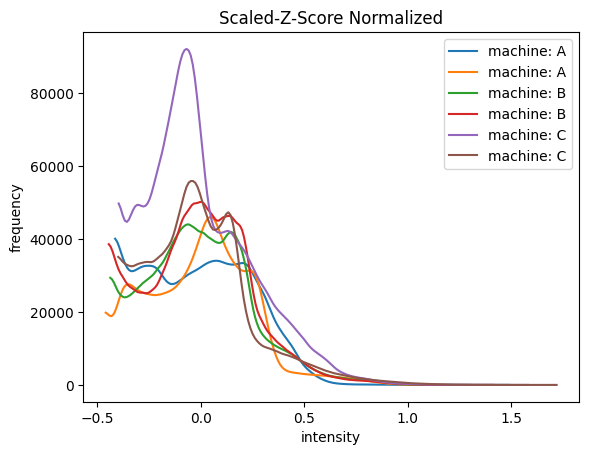

In [34]:
hist_data = []
bin_data = []
label_data = []
mixed_dir = [(category_dir[key][i],key) for key in ['A','B','C'] for i in range(2)]
threshold_dict = {'A':100, 'B':40, 'C':40}

for (mri_img_path,mask_path),cat in mixed_dir:
    mri_img = sitk.ReadImage(mri_img_path)
    mri_img = sitk.GetArrayFromImage(mri_img)
    mask_original = sitk.ReadImage(mask_path)
    mask_original = sitk.GetArrayFromImage(mask_original).astype(bool)

    threshold = threshold_dict[cat]
    mask_threshold = np.zeros_like(mri_img, dtype=bool)
    mask_threshold[mri_img > threshold] = 1

    mri_img_masked = mri_img[mask_original & mask_threshold]
    img_mean = np.mean(mri_img_masked)
    img_var = np.std(mri_img_masked)

    # mri_img_masked = np.where(mask_original & mask_threshold, mri_img, 0)
    # img_mean = np.mean(mri_img_masked[mri_img_masked != 0])
    # img_var = np.std(mri_img_masked[mri_img_masked != 0])

    normalized_img = (mri_img_masked - img_mean) / img_var
    # normalized_img += np.abs(np.min(normalized_img))
    # normalized_img *= 350
    normalized_img /= 4

    # getting histogram
    freq, bins = np.histogram(normalized_img.flatten(), bins=200)
    # freq, bins = np.histogram(normalized_img[normalized_img !=0].flatten(), bins=200)
    bin_data.append(bins)
    hist_data.append(freq)
    label_data.append(cat)

smoothed_hist_data = [gaussian_filter1d(hist, sigma=2) for hist in hist_data]

plt.figure()
for binss,hist,cat in zip(bin_data, smoothed_hist_data, label_data):
    plt.plot(binss[:-1], hist, label=f'machine: {cat}')
plt.legend()
plt.xlabel('intensity')
plt.ylabel('frequency')
plt.title('Scaled-Z-Score Normalized')
plt.show()

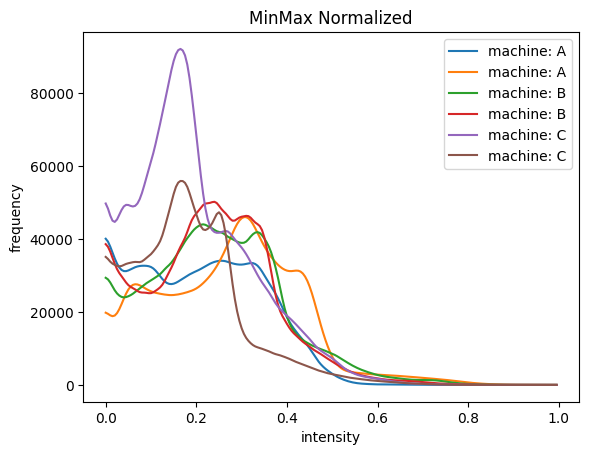

In [33]:
hist_data = []
bin_data = []
label_data = []
mixed_dir = [(category_dir[key][i],key) for key in ['A','B','C'] for i in range(2)]
threshold_dict = {'A':100, 'B':40, 'C':40}

for (mri_img_path,mask_path),cat in mixed_dir:
    mri_img = sitk.ReadImage(mri_img_path)
    mri_img = sitk.GetArrayFromImage(mri_img)
    mask_original = sitk.ReadImage(mask_path)
    mask_original = sitk.GetArrayFromImage(mask_original).astype(bool)

    threshold = threshold_dict[cat]
    mask_threshold = np.zeros_like(mri_img, dtype=bool)
    mask_threshold[mri_img > threshold] = 1
    mri_img_masked = mri_img[mask_original & mask_threshold]
    normalized_img = mri_img_masked
    normalized_img = (normalized_img - np.min(normalized_img)) / (np.max(normalized_img) - np.min(normalized_img))

    # getting histogram
    freq, bins = np.histogram(normalized_img.flatten(), bins=200)
    bin_data.append(bins)
    hist_data.append(freq)
    label_data.append(cat)
    
smoothed_hist_data = [gaussian_filter1d(hist, sigma=2) for hist in hist_data]

plt.figure()
for binss,hist,cat in zip(bin_data, smoothed_hist_data, label_data):
    plt.plot(binss[:-1], hist, label=f'machine: {cat}')
plt.legend()
plt.xlabel('intensity')
plt.ylabel('frequency')
plt.title('MinMax Normalized')
plt.show()

In [ ]:
from scipy.ndimage import gaussian_filter1d

# Apply Gaussian smoothing to the hist_data
smoothed_hist_data = [gaussian_filter1d(hist, sigma=2) for hist in hist_data]

# Plot the smoothed histograms
plt.figure()
for binss, hist, cat in zip(bin_data, smoothed_hist_data, label_data):
    plt.plot(binss[:-1], hist, label=f'machine: {cat}')
plt.legend()
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.title('Smoothed Histogram of MRI images')
plt.show()

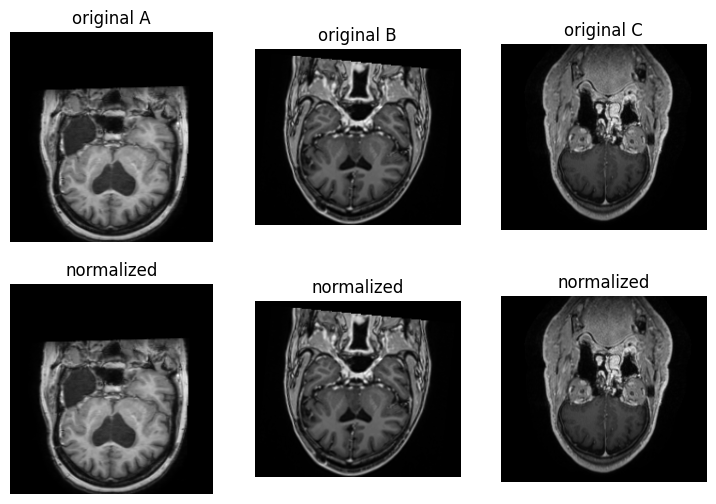

In [38]:
plt.figure(figsize=(9,6))
slice_number = 100
mixed_dir = [(category_dir[key][i],key) for key in ['A','B','C'] for i in range(1)]
threshold_dict = {'A':100, 'B':40, 'C':40}
i = 1

for (mri_img_path,mask_path),cat in mixed_dir:
    mri_img = sitk.ReadImage(mri_img_path)
    mri_img = sitk.GetArrayFromImage(mri_img)
    mask_original = sitk.ReadImage(mask_path)
    mask_original = sitk.GetArrayFromImage(mask_original).astype(bool)

    threshold = threshold_dict[cat]
    mask_threshold = np.zeros_like(mri_img, dtype=bool)
    mask_threshold[mri_img > threshold] = 1

    mri_img_masked = mri_img[mask_original & mask_threshold]

    img_mean = np.mean(mri_img_masked)
    img_var = np.std(mri_img_masked)

    # normalized_img = (mri_img_masked - img_mean) / img_var
    normalized_img = (mri_img - img_mean) / img_var
    normalized_img += np.abs(np.min(normalized_img))
    normalized_img *= 350

    # original image
    plt.subplot(2,3,i)
    plt.imshow(normalized_img[:,slice_number,:], cmap='gray')
    plt.axis('off')
    plt.title('original '+ str(cat))

    # normalized image
    plt.subplot(2,3,i+3)
    plt.imshow(normalized_img[:,slice_number,:], cmap='gray')
    plt.axis('off')
    plt.title('normalized')
    i += 1
    # getting histogram
    # freq, bins = np.histogram(normalized_img[normalized_img !=0].flatten(), bins=200)
    # bin_data.append(bins)
    # hist_data.append(freq)

# plt.figure()
# for binss,hist in zip(bin_data, hist_data):
#     plt.plot(binss[:-1], hist)
plt.show()

Done. it seems that it works

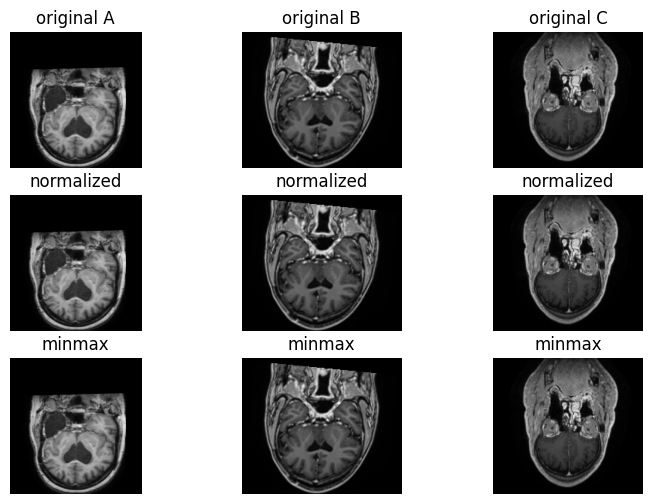

In [9]:
plt.figure(figsize=(9,6))
slice_number = 100
mixed_dir = [(category_dir[key][i],key) for key in ['A','B','C'] for i in range(1)]
threshold_dict = {'A':100, 'B':40, 'C':40}
i = 1

for (mri_img_path,mask_path),cat in mixed_dir:
    mri_img = sitk.ReadImage(mri_img_path)
    mri_img = sitk.GetArrayFromImage(mri_img)
    mask_original = sitk.ReadImage(mask_path)
    mask_original = sitk.GetArrayFromImage(mask_original).astype(bool)

    img_mean = np.mean(mri_img)
    img_var = np.std(mri_img)

    normalized_img = (mri_img - img_mean) / img_var
    normalized_img /= 4

    minmax = (mri_img - np.min(mri_img)) / (np.max(mri_img) - np.min(mri_img))

    # original image
    plt.subplot(3,3,i)
    plt.imshow(normalized_img[:,slice_number,:], cmap='gray')
    plt.axis('off')
    plt.title('original '+ str(cat))

    # z-score normalized image
    plt.subplot(3,3,i+3)
    plt.imshow(normalized_img[:,slice_number,:], cmap='gray')
    plt.axis('off')
    plt.title('normalized')

    # minmax normalized image
    plt.subplot(3,3,i+6)
    plt.imshow(minmax[:,slice_number,:], cmap='gray')
    plt.axis('off')
    plt.title('minmax')
    i += 1
    # getting histogram
    # freq, bins = np.histogram(normalized_img[normalized_img !=0].flatten(), bins=200)
    # bin_data.append(bins)
    # hist_data.append(freq)

# plt.figure()
# for binss,hist in zip(bin_data, hist_data):
#     plt.plot(binss[:-1], hist)
plt.show()

In [49]:
mri_img_path = dataset_dir[0]
mask_path = mask_dir[0]
mri_img = sitk.ReadImage(mri_img_path)
mri_img = sitk.GetArrayFromImage(mri_img)
mask_original = sitk.ReadImage(mask_path)
mask_original = sitk.GetArrayFromImage(mask_original).astype(bool)

mri_img_masked = mri_img[~mask_original]
np.set_printoptions(suppress=True)
np.transpose(np.unique(mri_img_masked, return_counts = True))

array([[      0., 2848034.],
       [      1.,  122842.],
       [      2.,  566079.],
       [      3.,  602547.],
       [      4.,  461058.],
       [      5.,  302807.],
       [      6.,  164073.],
       [      7.,   84423.],
       [      8.,   44787.],
       [      9.,   23971.],
       [     10.,   12550.],
       [     11.,    6297.],
       [     12.,    3359.],
       [     13.,    1737.],
       [     14.,     926.],
       [     15.,     538.],
       [     16.,     307.],
       [     17.,     240.],
       [     18.,     167.],
       [     19.,     140.],
       [     20.,      74.],
       [     21.,      78.],
       [     22.,      59.],
       [     23.,      60.],
       [     24.,      32.],
       [     25.,      33.],
       [     26.,      24.],
       [     27.,      21.],
       [     28.,      27.],
       [     29.,      12.],
       [     30.,      15.],
       [     31.,      12.],
       [     32.,       8.],
       [     33.,       5.],
       [     3

In [51]:
mri_img = np.where(~mask_original, 0, mri_img)  
mri_img_masked = mri_img[~mask_original]
np.set_printoptions(suppress=True)
np.transpose(np.unique(mri_img_masked, return_counts = True))

array([[      0., 5247376.]])

## Script for Normalization

In [ ]:
DATA_PARENT_DIR = '../Task1/brain/'
dataset_dir = [os.path.join(DATA_PARENT_DIR, mri_path, 'mr.nii.gz') for mri_path in os.listdir(DATA_PARENT_DIR)]
mask_dir = [os.path.join(DATA_PARENT_DIR, mri_path, 'mask.nii.gz') for mri_path in os.listdir(DATA_PARENT_DIR)]
category = [dataset_dir[i].split('/')[-2][2] for i in range(len(dataset_dir))]

In [55]:
threshold_dict = {'A':100, 'B':40, 'C':40}
NORMALIZATION_FACTOR = 350

for cat in ['A','B','C']:
    for mri_img_path, mask_path in category_dir[cat][:1]:

        # read MRI and its mask
        mri_img_sitk = sitk.ReadImage(mri_img_path)
        mri_img = sitk.GetArrayFromImage(mri_img_sitk)
        mask_original = sitk.ReadImage(mask_path)
        mask_original = sitk.GetArrayFromImage(mask_original).astype(bool)

        # create the threshold mask
        threshold = threshold_dict[cat]
        mask_threshold = np.zeros_like(mri_img, dtype=bool)
        mask_threshold[mri_img > threshold] = 1

        # apply the mask and create a 1-D array of intersting voxels
        mri_img_masked = mri_img[mask_original & mask_threshold]

        # calculate mean and standard deviation
        img_mean = np.mean(mri_img_masked)
        img_var = np.std(mri_img_masked)

        # zero out the voxel outside the original mask (filter out non-interesting values) and normalize the image
        normalized_img = np.where(~mask_original, 0, mri_img)   
        normalized_img = (mri_img - img_mean) / img_var
        normalized_img += np.abs(np.min(normalized_img))
        normalized_img *= NORMALIZATION_FACTOR

        # convert back to SITK
        normalized_img_sitk = sitk.GetImageFromArray(normalized_img)
        normalized_img_sitk.CopyInformation(mri_img_sitk)


## MinMax after Z-Score

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import SimpleITK as sitk

DATA_PARENT_DIR = '../Task1/brain/'
iterable_dir_list = sorted(os.listdir(DATA_PARENT_DIR), key=lambda x: x)
dataset_parent_dir = [os.path.join(DATA_PARENT_DIR, mri_path) for mri_path in iterable_dir_list]

In [2]:
img1 = sitk.GetArrayFromImage(sitk.ReadImage(os.path.join(dataset_parent_dir[0],'mr.nii.gz')))
img2 = sitk.GetArrayFromImage(sitk.ReadImage(os.path.join(dataset_parent_dir[70],'mr.nii.gz')))
img3 = sitk.GetArrayFromImage(sitk.ReadImage(os.path.join(dataset_parent_dir[150],'mr.nii.gz')))

In [40]:
def hist_(mri_img, threshold=100, bins=200):
    mask_threshold = np.zeros_like(mri_img, dtype=bool)
    mask_threshold[mri_img > threshold] = 1

    mri_img_masked = mri_img[mask_threshold]

    freq, binss = np.histogram(mri_img_masked.flatten(), bins=bins)
    return freq, binss

def z_score(mri_img, threshold=100, bins=200):
    mask_threshold = np.zeros_like(mri_img, dtype=bool)
    mask_threshold[mri_img > threshold] = 1

    mri_img_masked = mri_img[mask_threshold]
    img_mean = np.mean(mri_img_masked)
    img_var = np.std(mri_img_masked)

    normalized_img = (mri_img_masked - img_mean) / img_var

    freq, binss = np.histogram(normalized_img.flatten(), bins=bins)
    return freq, binss

def minmax(mri_img, threshold=100, bins=200):
    mask_threshold = np.zeros_like(mri_img, dtype=bool)
    mask_threshold[mri_img > threshold] = 1

    mri_img_masked = mri_img[mask_threshold]
    img_min = np.min(mri_img_masked)
    img_max = np.max(mri_img_masked)

    normalized_img = (mri_img_masked - img_min) / (img_max - img_min)

    freq, binss = np.histogram(normalized_img.flatten(), bins=bins)
    return freq, binss

def zsocre_minmax(mri_img, threshold=100, bins=200):
    mask_threshold = np.zeros_like(mri_img, dtype=bool)
    mask_threshold[mri_img > threshold] = 1

    mri_img_masked = mri_img[mask_threshold]  
    img_mean = np.mean(mri_img_masked)
    img_var = np.std(mri_img_masked)

    zscore_img = (mri_img_masked - img_mean) / img_var
    img_min = np.min(zscore_img)
    img_max = np.max(zscore_img)  
    normalized_img = (zscore_img - img_min) / (img_max - img_min)

    freq, binss = np.histogram(normalized_img.flatten(), bins=bins)
    return freq, binss

def zsocre_clip_minmax(mri_img, threshold=100, bins=200):
    mask_threshold = np.zeros_like(mri_img, dtype=bool)
    mask_threshold[mri_img > threshold] = 1

    mri_img_masked = mri_img[mask_threshold]  
    img_mean = np.mean(mri_img_masked)
    img_var = np.std(mri_img_masked)

    zscore_img = (mri_img_masked - img_mean) / img_var

    # percentile_95 = np.percentile(zscore_img, 99)
    percentile_95 = 4
    zscore_img = np.clip(zscore_img, None, percentile_95)

    img_min = np.min(zscore_img)
    img_max = np.max(zscore_img) 
    normalized_img = (zscore_img - img_min) / (img_max - img_min)

    freq, binss = np.histogram(normalized_img.flatten(), bins=bins)
    return freq, binss

def minmax_clip(mri_img, threshold=100, bins=200):
    mask_threshold = np.zeros_like(mri_img, dtype=bool)
    mask_threshold[mri_img > threshold] = 1

    mri_img_masked = mri_img[mask_threshold]  

    percentile_95 = np.percentile(mri_img_masked, 99.95)
    clip_img = np.clip(mri_img_masked, None, percentile_95)

    img_min = np.min(clip_img)
    img_max = np.max(clip_img) 
    normalized_img = (clip_img - img_min) / (img_max - img_min)

    freq, binss = np.histogram(normalized_img.flatten(), bins=bins)
    return freq, binss

/tmp/ipykernel_28779/1941367452.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  ax.plot(bins[:-1], freq, label=f'Image {images.index(img) + 1}')  # bins[:-1] to match frequency length


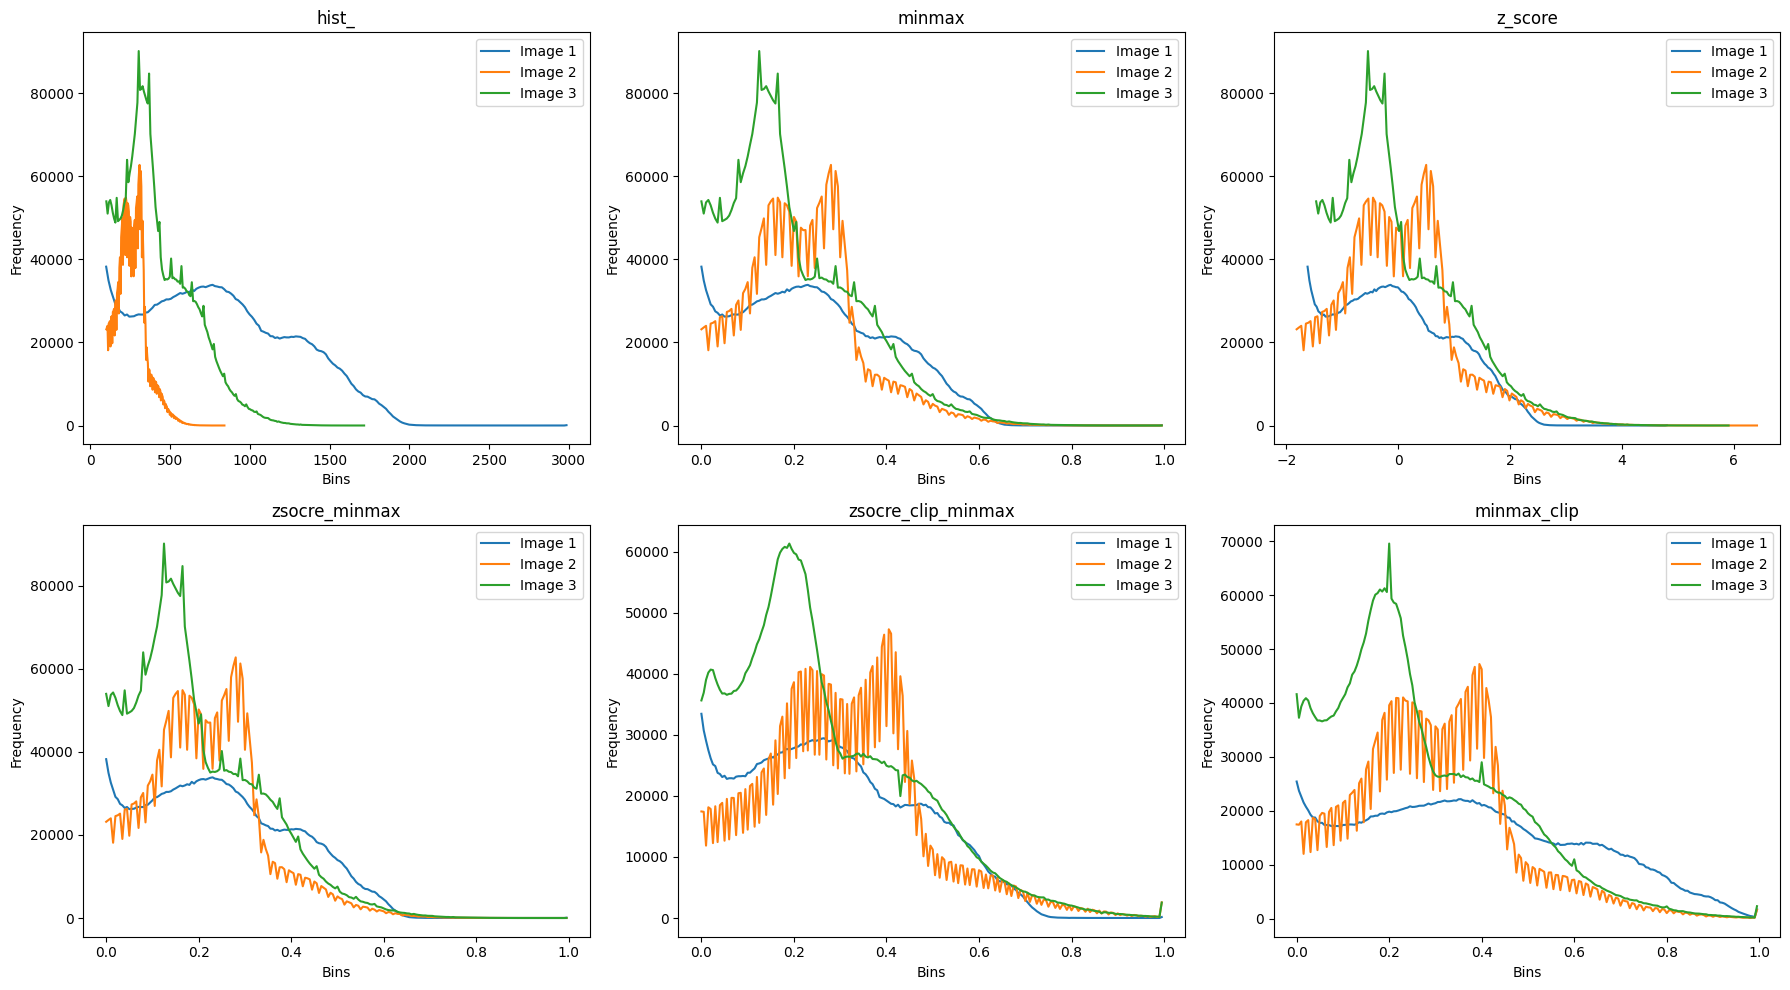

In [41]:
images = [img1, img2, img3]
functions = [hist_, minmax, z_score, zsocre_minmax, zsocre_clip_minmax, minmax_clip]
function_names = ["hist_", "minmax", "z_score", "zsocre_minmax", "zsocre_clip_minmax", "minmax_clip"]

# Plotting
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 2 rows, 3 columns

for ax, func, func_name in zip(axes.flat, functions, function_names):
    for img in images:
        freq, bins = func(img)
        ax.plot(bins[:-1], freq, label=f'Image {images.index(img) + 1}')  # bins[:-1] to match frequency length
    
    ax.set_title(func_name)
    ax.set_xlabel("Bins")
    ax.set_ylabel("Frequency")
    ax.legend()

# Hide any unused subplot (if functions < 6)
for ax in axes.flat[len(functions):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

In [30]:
mri_img = img1
mask_threshold = np.zeros_like(mri_img, dtype=bool)
mask_threshold[mri_img > threshold] = 1

mri_img_masked = mri_img[mask_threshold]  
img_mean = np.mean(mri_img_masked)
img_var = np.std(mri_img_masked)

zscore = (mri_img_masked - img_mean) / img_var

percentile_95 = np.percentile(zscore, 99)
zscore_img = np.clip(zscore, None, percentile_95)
print(np.max(zscore), percentile_95, np.max(zscore_img))

4.836572 2.220769319534302 2.2207694


In [9]:
def hist_(mri_img, threshold=100, bins=200):
    mask_threshold = np.zeros_like(mri_img, dtype=bool)
    mask_threshold[mri_img > threshold] = 1

    mri_img_masked = mri_img[mask_threshold]

    freq, binss = np.histogram(mri_img_masked.flatten(), bins=bins)
    return freq, binss

def z_score(mri_img, threshold=100, bins=200):
    mask_threshold = np.zeros_like(mri_img, dtype=bool)
    mask_threshold[mri_img > threshold] = 1

    mri_img_masked = mri_img[mask_threshold]
    img_mean = np.mean(mri_img_masked)
    img_var = np.std(mri_img_masked)

    normalized_img = (mri_img_masked - img_mean) / img_var

    freq, binss = np.histogram(normalized_img.flatten(), bins=bins)
    return freq, binss

def minmax(mri_img, threshold=100, bins=200):
    mask_threshold = np.zeros_like(mri_img, dtype=bool)
    mask_threshold[mri_img > threshold] = 1

    mri_img_masked = mri_img[mask_threshold]
    img_min = np.min(mri_img_masked)
    img_max = np.max(mri_img_masked)

    normalized_img = (mri_img_masked - img_min) / (img_max - img_min)
    normalized_img = 2 * normalized_img - 1

    freq, binss = np.histogram(normalized_img.flatten(), bins=bins)
    return freq, binss

def zscore__symmetric(mri_img, threshold=100, bins=200):
    mask_threshold = np.zeros_like(mri_img, dtype=bool)
    mask_threshold[mri_img > threshold] = 1

    mri_img_masked = mri_img[mask_threshold]  
    img_mean = np.mean(mri_img_masked)
    img_var = np.std(mri_img_masked)

    zscore_img = (mri_img_masked - img_mean) / img_var
    zscore_img -= 1
    zscore_img /= 3

    freq, binss = np.histogram(zscore_img.flatten(), bins=bins)
    return freq, binss

def zscore__symmetric_clip(mri_img, threshold=100, bins=200):
    mask_threshold = np.zeros_like(mri_img, dtype=bool)
    mask_threshold[mri_img > threshold] = 1

    mri_img_masked = mri_img[mask_threshold]  
    img_mean = np.mean(mri_img_masked)
    img_var = np.std(mri_img_masked)

    zscore_img = (mri_img_masked - img_mean) / img_var
    zscore_img -= 1
    zscore_img /= 3
    clip_img = np.clip(zscore_img, -1, 1)

    freq, binss = np.histogram(clip_img.flatten(), bins=bins)
    return freq, binss

def zscore_squeeze(mri_img, threshold=100, bins=200):
    mask_threshold = np.zeros_like(mri_img, dtype=bool)
    mask_threshold[mri_img > threshold] = 1

    mri_img_masked = mri_img[mask_threshold]  
    img_mean = np.mean(mri_img_masked)
    img_var = np.std(mri_img_masked)

    zscore_img = (mri_img_masked - img_mean) / img_var
    zscore_img /= 4
    clip_img = np.clip(zscore_img, None, 1)

    freq, binss = np.histogram(clip_img.flatten(), bins=bins)
    return freq, binss


/tmp/ipykernel_5692/614568437.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  ax.plot(bins[:-1], freq, label=f'Image {images.index(img) + 1}')  # bins[:-1] to match frequency length


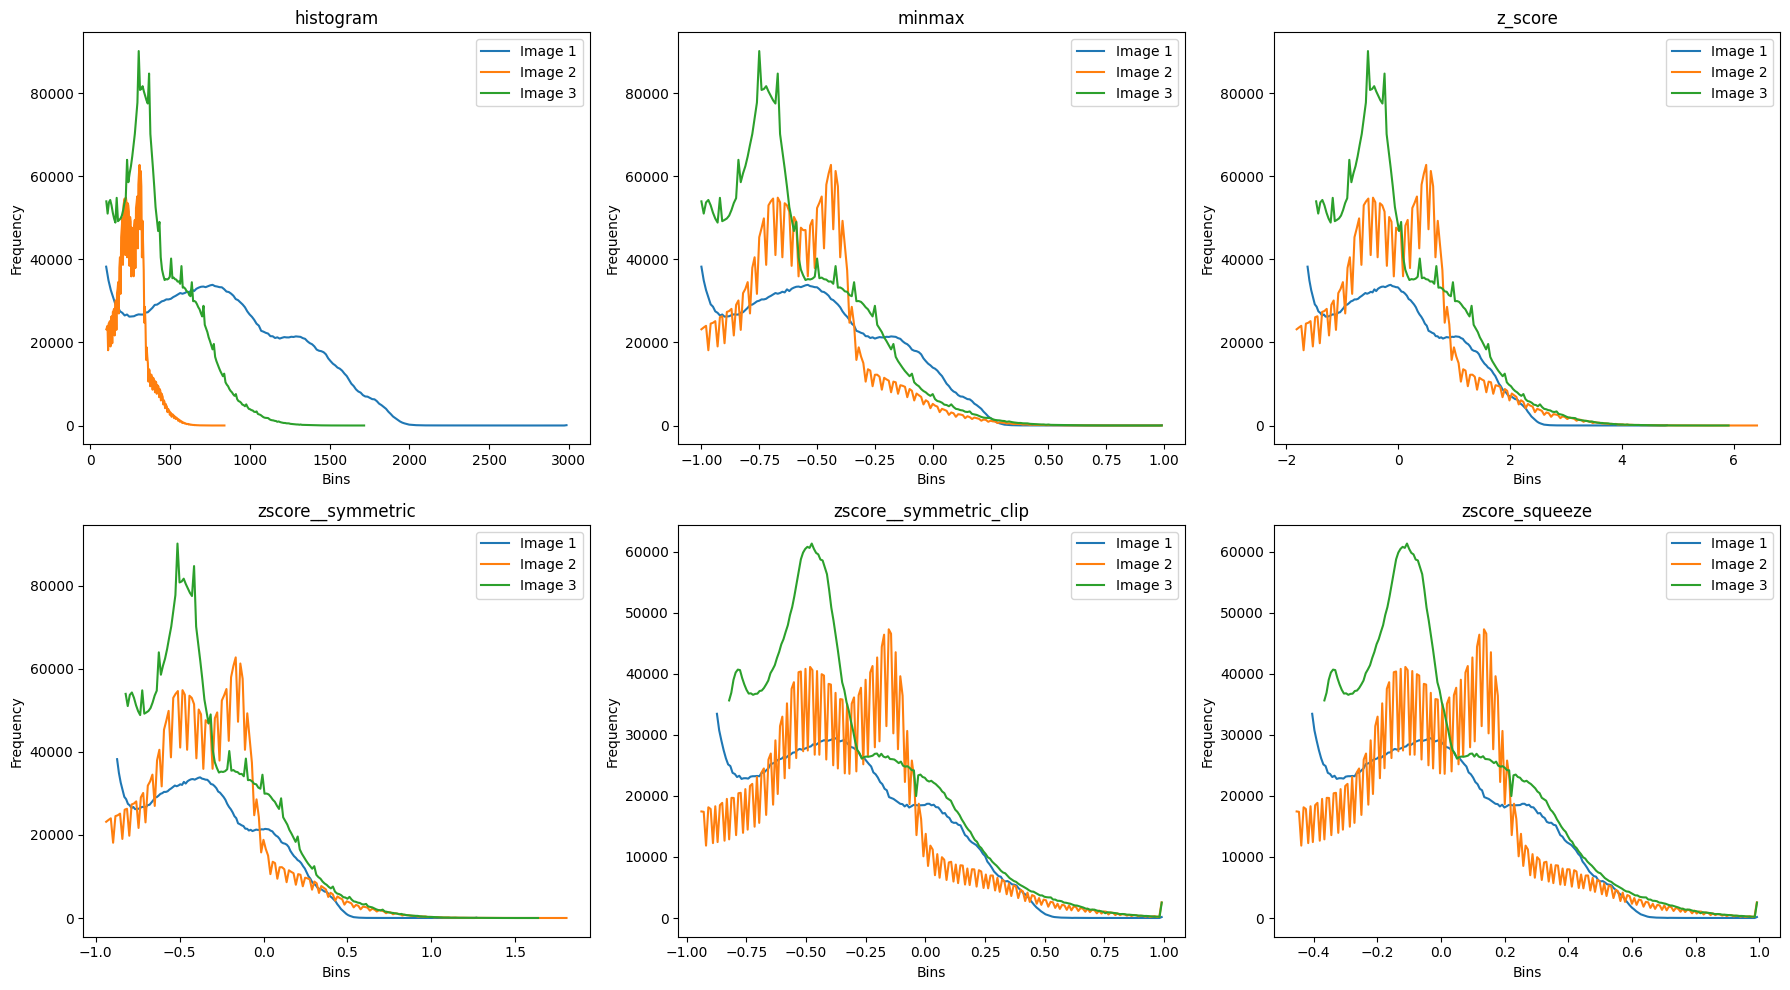

In [11]:
images = [img1, img2, img3]
functions = [hist_, minmax, z_score, zscore__symmetric, zscore__symmetric_clip, zscore_squeeze]
function_names = ["histogram", "minmax", "z_score", "zscore__symmetric", "zscore__symmetric_clip", "zscore_squeeze"]

# Plotting
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 2 rows, 3 columns

for ax, func, func_name in zip(axes.flat, functions, function_names):
    for img in images:
        freq, bins = func(img)
        ax.plot(bins[:-1], freq, label=f'Image {images.index(img) + 1}')  # bins[:-1] to match frequency length
    
    ax.set_title(func_name)
    ax.set_xlabel("Bins")
    ax.set_ylabel("Frequency")
    ax.legend()

# Hide any unused subplot (if functions < 6)
for ax in axes.flat[len(functions):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

## CT

In [11]:
img1 = sitk.GetArrayFromImage(sitk.ReadImage(os.path.join(dataset_parent_dir[32],'ct.nii.gz')))
img2 = sitk.GetArrayFromImage(sitk.ReadImage(os.path.join(dataset_parent_dir[20],'ct.nii.gz')))
img3 = sitk.GetArrayFromImage(sitk.ReadImage(os.path.join(dataset_parent_dir[132],'ct.nii.gz')))

In [10]:
dataset_parent_dir[32], dataset_parent_dir[20], dataset_parent_dir[132]

('../Task1/brain/1BA189', '../Task1/brain/1BA125', '../Task1/brain/1BC022')

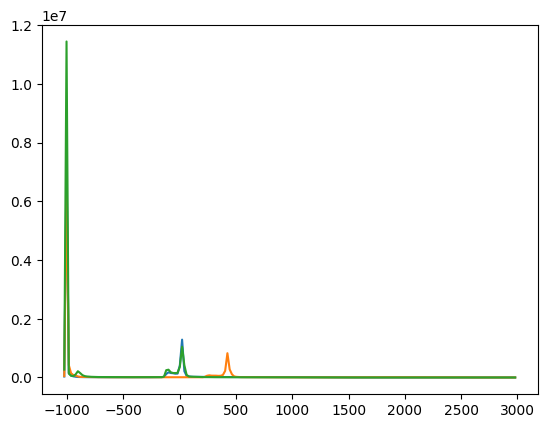

In [ ]:
freq1, binss = np.histogram(img1.flatten(), bins=200)
freq2, binss = np.histogram(img2.flatten(), bins=200)
freq3, binss = np.histogram(img3.flatten(), bins=200)

plt.figure()
plt.plot(binss[:-1], freq1)
plt.plot(binss[:-1], freq2)
plt.plot(binss[:-1], freq3)
plt.show()

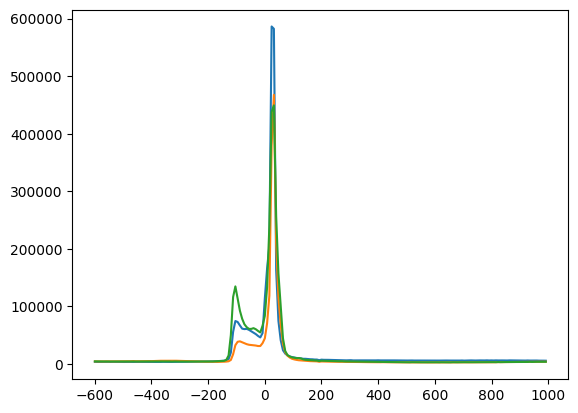

In [ ]:
freq1, binss = np.histogram(img1[(img1 > -600) & (img1 < 1000)].flatten(), bins=200)
freq2, binss = np.histogram(img2[(img2 > -600) & (img2 < 1000)].flatten(), bins=200)
freq3, binss = np.histogram(img3[(img3 > -600) & (img3 < 1000)].flatten(), bins=200)

plt.figure()
plt.plot(binss[:-1], freq1, label='1BA189')
plt.plot(binss[:-1], freq2, label='1BA125')
plt.plot(binss[:-1], freq3, label='1BC022')
plt.show()

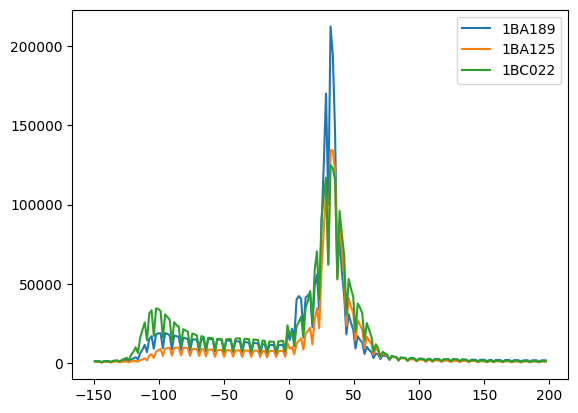

In [21]:
freq1, binss = np.histogram(img1[(img1 > -150) & (img1 < 200)].flatten(), bins=200)
freq2, binss = np.histogram(img2[(img2 > -150) & (img2 < 200)].flatten(), bins=200)
freq3, binss = np.histogram(img3[(img3 > -150) & (img3 < 200)].flatten(), bins=200)

plt.figure()
plt.plot(binss[:-1], freq1, label='1BA189')
plt.plot(binss[:-1], freq2, label='1BA125')
plt.plot(binss[:-1], freq3, label='1BC022')
plt.legend()
plt.show()

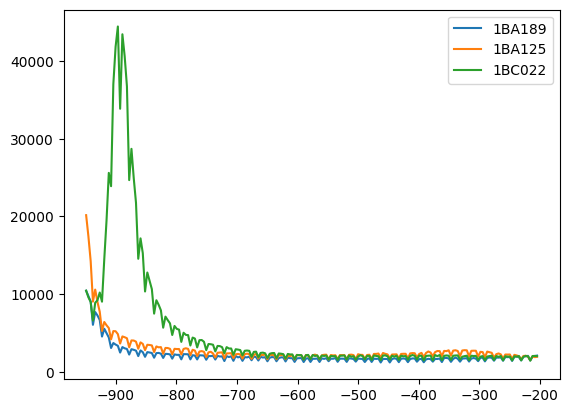

In [19]:
freq1, binss = np.histogram(img1[(img1 > -950) & (img1 < -200)].flatten(), bins=200)
freq2, binss = np.histogram(img2[(img2 > -950) & (img2 < -200)].flatten(), bins=200)
freq3, binss = np.histogram(img3[(img3 > -950) & (img3 < -200)].flatten(), bins=200)

plt.figure()
plt.plot(binss[:-1], freq1, label='1BA189')
plt.plot(binss[:-1], freq2, label='1BA125')
plt.plot(binss[:-1], freq3, label='1BC022')
plt.legend()
plt.show()

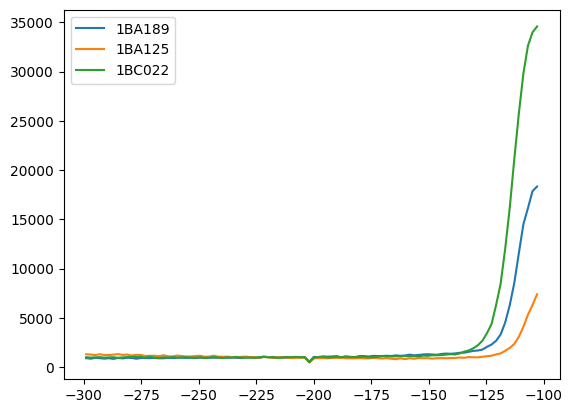

In [26]:
freq1, binss = np.histogram(img1[(img1 > -300) & (img1 < -100)].flatten(), bins=100)
freq2, binss = np.histogram(img2[(img2 > -300) & (img2 < -100)].flatten(), bins=100)
freq3, binss = np.histogram(img3[(img3 > -300) & (img3 < -100)].flatten(), bins=100)

plt.figure()
plt.plot(binss[:-1], freq1, label='1BA189')
plt.plot(binss[:-1], freq2, label='1BA125')
plt.plot(binss[:-1], freq3, label='1BC022')
plt.legend()
plt.show()

Ok lets count how many are below -150 (my speculation of thresholding)

In [42]:
flat = img1.flatten()
length = len(flat)
nonmin = len(img1[img1 > -900])
bone = len(img1[img1 > 400])
artifact = len(img1[(img1 > -600) & (img1 < -150)])

In [45]:
nonmin/length*100, bone/length*100, artifact/length*100

(35.12839939860431, 5.521067761030316, 1.7018437668011206)

#### Threshold -150 result

In [12]:
img = sitk.GetArrayFromImage(sitk.ReadImage('/home/taha/Downloads/Panacea/mri_to_ct/mri_to_ct/25_02_26_thresh150/infer/saved/1BA075_sct.nii.gz'))
img_orig = sitk.GetArrayFromImage(sitk.ReadImage('/home/taha/Downloads/Panacea/dataset/TEST/CT/1BA075_ct.nii.gz'))

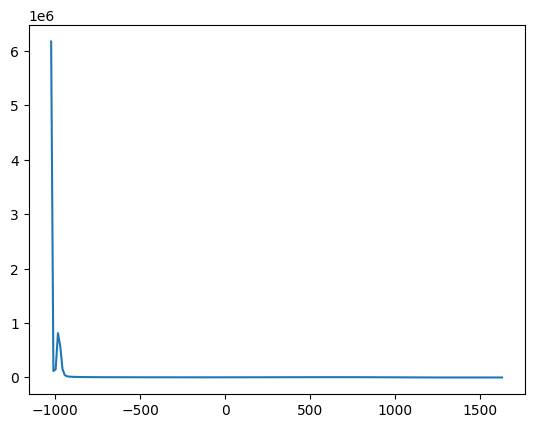

In [13]:
freq, binss = np.histogram(img.flatten(), bins=200)
plt.plot(binss[:-1], freq)

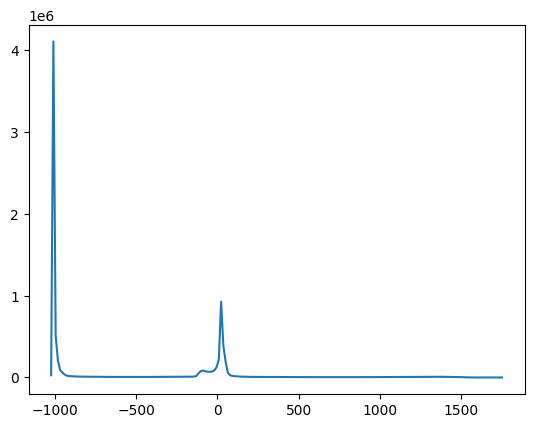

In [14]:
freq, binss = np.histogram(img_orig.flatten(), bins=200)
plt.plot(binss[:-1], freq)

In [15]:
def remove_artifacts(image_sitk, threshold=-150):
    binary_mask = sitk.BinaryThreshold(image_sitk, lowerThreshold=threshold, upperThreshold=3000)
    connected_components = sitk.ConnectedComponent(binary_mask)
    labeled_components = sitk.RelabelComponent(connected_components, sortByObjectSize=True)
    skull_mask = sitk.BinaryThreshold(labeled_components, lowerThreshold=1, upperThreshold=1, insideValue=1, outsideValue=0)
    skull_image = sitk.Mask(image_sitk, skull_mask)
    return skull_image

In [18]:
orig_ct = sitk.ReadImage('/home/taha/Downloads/Panacea/dataset/TEST/CT/1BA075_ct.nii.gz')
print(np.min(sitk.GetArrayFromImage(orig_ct)))
print(np.min(sitk.GetArrayFromImage(remove_artifacts(orig_ct))))

-1024.0
-150.0


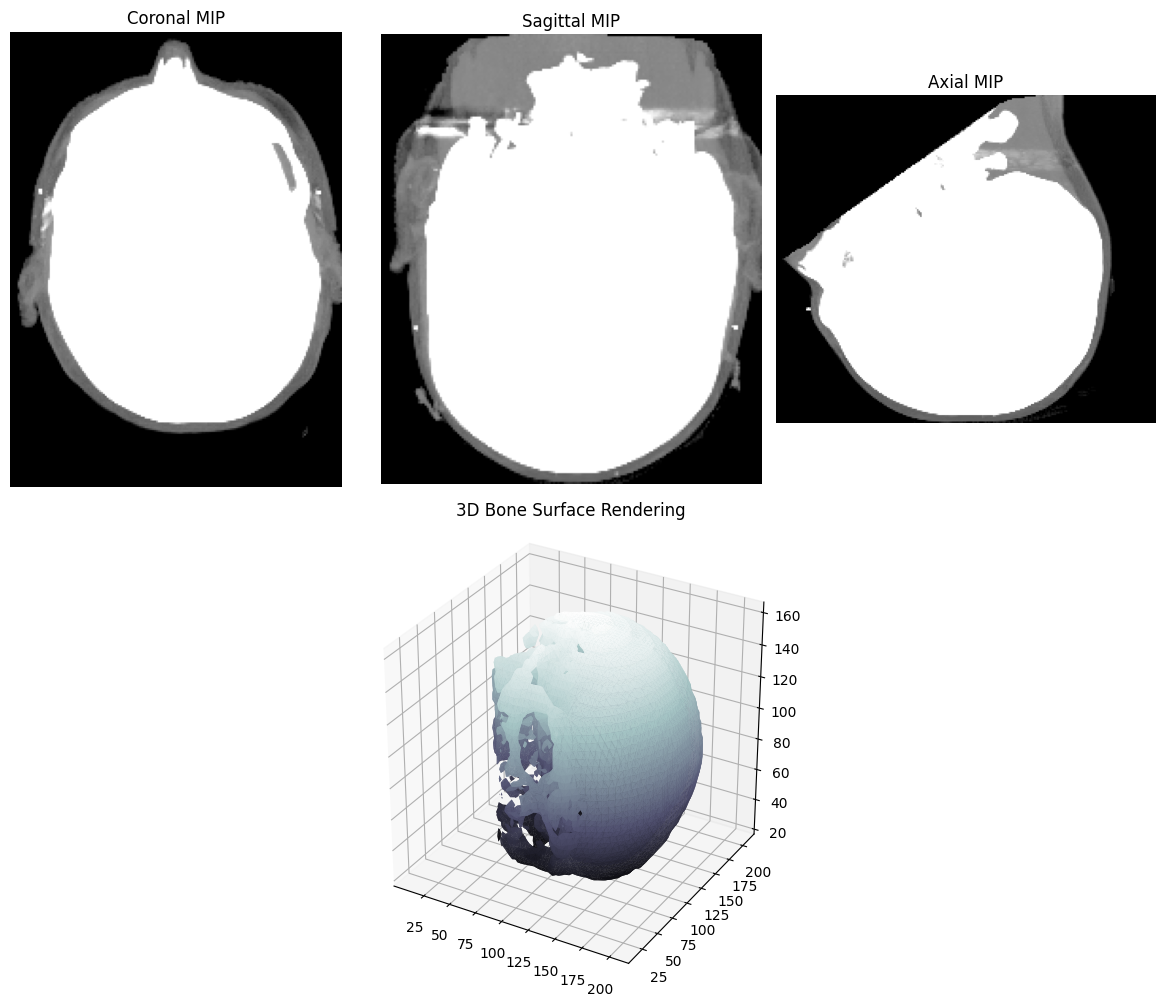

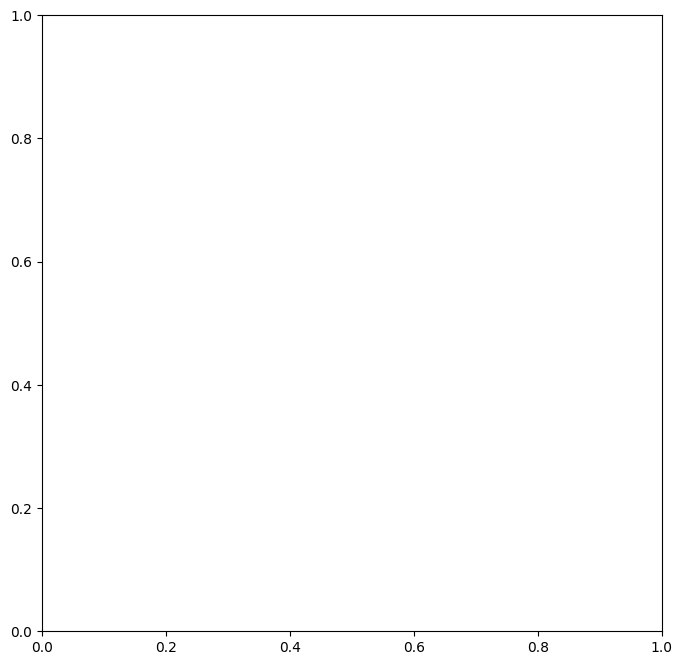

interactive(children=(IntSlider(value=103, continuous_update=False, description='Slice:', max=206), IntSlider(…

In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import SimpleITK as sitk
from matplotlib import cm
import ipywidgets as widgets
from IPython.display import display

def visualize_3d_ct(image_path, figsize=(12, 10), cmap='gray', window_center=50, window_width=400):
    """
    Visualize a 3D CT image using multiple visualization techniques with CT-specific windowing
    
    Parameters:
    -----------
    image_path : str
        Path to the CT image file (.nii.gz format)
    figsize : tuple
        Figure size for the plots
    cmap : str
        Colormap to use for the visualization
    window_center : int
        Center of the window for CT Hounsfield units
    window_width : int
        Width of the window for CT Hounsfield units
    """
    # Load the image
    img_sitk = sitk.ReadImage(image_path)
    img_array = sitk.GetArrayFromImage(img_sitk)
    
    # Apply CT windowing (convert to Hounsfield units display range)
    def apply_window(image, center, width):
        min_value = center - width // 2
        max_value = center + width // 2
        windowed = np.clip(image, min_value, max_value)
        # Normalize to 0-1 range for display
        windowed = (windowed - min_value) / (max_value - min_value)
        return windowed
    
    img_windowed = apply_window(img_array, window_center, window_width)
    
    # Get image dimensions
    depth, height, width = img_array.shape
    
    # Create figure with multiple subplots for different visualization techniques
    fig = plt.figure(figsize=figsize)
    
    # 1. Maximum Intensity Projection (MIP) views
    ax1 = fig.add_subplot(231)
    ax1.imshow(np.max(img_windowed, axis=0), cmap=cmap)
    ax1.set_title('Coronal MIP')
    ax1.axis('off')
    
    ax2 = fig.add_subplot(232)
    ax2.imshow(np.max(img_windowed, axis=1), cmap=cmap)
    ax2.set_title('Sagittal MIP')
    ax2.axis('off')
    
    ax3 = fig.add_subplot(233)
    ax3.imshow(np.max(img_windowed, axis=2), cmap=cmap)
    ax3.set_title('Axial MIP')
    ax3.axis('off')
    
    # 2. 3D Surface Rendering
    ax4 = fig.add_subplot(212, projection='3d')
    
    # Create a downsampled version for faster rendering
    downsample = 4
    img_downsampled = img_array[::downsample, ::downsample, ::downsample]
    
    # For CT, use a bone-specific threshold (around 200-300 HU for bone)
    threshold = 250  # Hounsfield units for bone
    
    try:
        # Create a binary mask for the bone
        verts, faces, _, _ = measure_marching_cubes(
            img_downsampled, 
            level=threshold,
            spacing=(downsample, downsample, downsample)
        )
        
        # Plot the 3D surface
        ax4.plot_trisurf(verts[:, 0], verts[:, 1], faces, verts[:, 2],
                        cmap='bone', lw=0, alpha=0.9)
    except Exception as e:
        print(f"3D rendering failed: {str(e)}")
        ax4.text(0.5, 0.5, "3D rendering failed", 
                horizontalalignment='center', verticalalignment='center')
    
    # Set equal aspect ratio
    ax4.set_box_aspect([1, 1, 1])
    ax4.set_title('3D Bone Surface Rendering')
    
    plt.tight_layout()
    plt.show()
    
    # 3. Interactive slice viewer with windowing controls
    def view_slices(axis=0, slice_num=None, w_center=window_center, w_width=window_width):
        """Create an interactive slice viewer with windowing controls"""
        if slice_num is None:
            slice_num = img_array.shape[axis] // 2
            
        fig, ax = plt.subplots(figsize=(8, 8))
        
        def update_slice(slice_idx, center, width):
            ax.clear()
            # Apply windowing
            windowed_data = apply_window(img_array, center, width)
            
            if axis == 0:
                ax.imshow(windowed_data[slice_idx, :, :], cmap=cmap)
                ax.set_title(f'Axial Slice {slice_idx} (C:{center}/W:{width})')
            elif axis == 1:
                ax.imshow(windowed_data[:, slice_idx, :], cmap=cmap)
                ax.set_title(f'Coronal Slice {slice_idx} (C:{center}/W:{width})')
            else:
                ax.imshow(windowed_data[:, :, slice_idx], cmap=cmap)
                ax.set_title(f'Sagittal Slice {slice_idx} (C:{center}/W:{width})')
            ax.axis('off')
            fig.canvas.draw_idle()
            
        # Slice slider
        slice_slider = widgets.IntSlider(
            value=slice_num,
            min=0,
            max=img_array.shape[axis] - 1,
            step=1,
            description='Slice:',
            continuous_update=False
        )
        
        # Window center slider
        center_slider = widgets.IntSlider(
            value=w_center,
            min=-1000,
            max=3000,
            step=10,
            description='Center:',
            continuous_update=False
        )
        
        # Window width slider
        width_slider = widgets.IntSlider(
            value=w_width,
            min=1,
            max=4000,
            step=10,
            description='Width:',
            continuous_update=False
        )
        
        # Preset buttons for common CT windows
        bone_button = widgets.Button(description="Bone")
        soft_tissue_button = widgets.Button(description="Soft Tissue")
        lung_button = widgets.Button(description="Lung")
        brain_button = widgets.Button(description="Brain")
        
        def set_bone_window(b):
            center_slider.value = 500
            width_slider.value = 1500
            
        def set_soft_tissue_window(b):
            center_slider.value = 50
            width_slider.value = 400
            
        def set_lung_window(b):
            center_slider.value = -600
            width_slider.value = 1500
            
        def set_brain_window(b):
            center_slider.value = 40
            width_slider.value = 80
            
        bone_button.on_click(set_bone_window)
        soft_tissue_button.on_click(set_soft_tissue_window)
        lung_button.on_click(set_lung_window)
        brain_button.on_click(set_brain_window)
        
        # Display preset buttons
        display(widgets.HBox([bone_button, soft_tissue_button, lung_button, brain_button]))
        
        # Create interactive widget
        widgets.interact(update_slice, 
                         slice_idx=slice_slider, 
                         center=center_slider, 
                         width=width_slider)
        
        # Initialize display
        update_slice(slice_num, w_center, w_width)
        
    # Create buttons for different slice orientations
    axial_button = widgets.Button(description="Axial View")
    coronal_button = widgets.Button(description="Coronal View")
    sagittal_button = widgets.Button(description="Sagittal View")
    
    axial_button.on_click(lambda b: view_slices(0))
    coronal_button.on_click(lambda b: view_slices(1))
    sagittal_button.on_click(lambda b: view_slices(2))
    
    display(widgets.HBox([axial_button, coronal_button, sagittal_button]))
    
    # Start with axial view
    view_slices(0)
    
    return img_array

# Import scikit-image for marching cubes algorithm
from skimage.measure import marching_cubes as measure_marching_cubes

# Example usage
ct_data = visualize_3d_ct('/home/taha/Downloads/Panacea/dataset/TEST/CT/1BA075_ct.nii.gz')
